### <span style="color:#900C3F"><center>$ML$ $For$ $Bioinformatics$</center></span><span style="color:#C70039"><center>$Assignment$ $\#1$</center></span><span style="color:#FF5733"><center>$Question$ $\#6$</center></span><span style="color:#FFC300 "><center>$Hadis$ $Ahmadian$ $400211524$</center></span>

###  $Data$ $preperation$
**1. importing needed libraries**

In [2]:
import random
import numpy as np 
import pandas as pd 
from collections import Counter
import math
import matplotlib.pyplot as plt

**2. reading data from file:**

* first we read data from file and save it in data variable
* since age is a **none-categorical** attribute and has too many values, therfore it can cause problems in making a decision tree. a good aproach for solving this problem is categorizing age attribute wich means deviding ages into a few categories. for this means I used Equal **frequency binning** algorithm explained in link below:
https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38
* you can see the resaulting categories in output (I categorized age in 4 categories)

In [411]:
data = pd.read_csv ('lungcancer.csv')  

X=list(data["AGE"])
X.sort()
n=len(Counter(X).keys())

name=[]
for n in data:
    name.append(n)

tmp=[]
cnt=0
cate=[]
for a in X:
    if a not in tmp:
        cnt+=1
    tmp.append(a)
    if cnt==11:
        tmp.pop()
        cnt=0
        cate.append(tmp)
        tmp=[a]
cate.append(tmp)
for c in cate:
    print(c)

[21, 38, 39, 44, 44, 46, 47, 47, 47, 47, 48, 48, 49, 49, 49, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52]
[53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63]
[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7

* instead of each age, we replace its value by its category. you can see the result in output.
* for ease of work in next sections, instead of "M" and "F" wich are Gender values, we replace 1 for M and 2 for F.you can see the result in output. 

In [412]:
age=list(data["AGE"])
for i in range(len(age)):
    if age[i] in cate[0]:
        age[i]=1
    elif age[i] in cate[1]:
        age[i]=2
    elif age[i] in cate[2]:
        age[i]=3
    elif age[i] in cate[3]:
        age[i]=4
print(age)
    
gender=list(data["GENDER"])
for i in range(len(gender)):
    if gender[i]=="M":
        gender[i]=1
    else:
        gender[i]=2
print(gender)

[3, 3, 2, 2, 2, 4, 1, 1, 3, 2, 2, 3, 2, 2, 3, 1, 4, 2, 3, 2, 1, 3, 1, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 4, 1, 3, 3, 2, 3, 3, 2, 2, 2, 2, 1, 2, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 4, 4, 3, 3, 3, 2, 2, 2, 4, 2, 3, 3, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 3, 2, 2, 4, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 3, 2, 1, 2, 2, 4, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 2, 2, 4, 3, 3, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 3, 2, 3, 3, 3, 4, 1, 2, 2, 3, 2, 2, 3, 3, 4, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 4, 2, 3, 2, 3, 2, 2, 4, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 4, 2, 2, 2, 3, 3, 2, 2, 4, 3, 2, 1, 4, 3, 2, 2, 1, 4, 3, 2, 4, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 4, 4, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 4, 3, 3, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 3, 2]
[1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1,

now we update attributes with their new explained value.

In [413]:
data_list=[age,gender]
for d in data:
    if d=="AGE" or d=="GENDER":
        continue
    
    data_list.append(list(data[d]))

for ease of work we transpose the data matrix, rows will be samples and collumns are attributes.

In [414]:
data_list = list(zip(*data_list))
for i in range(len(data_list)):
    data_list[i]=list(data_list[i])
print(data_list[0])


[3, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 'YES']


### $Functions_{part1}$
**Entropy** : calculates entropy of data wich has a samples of class A and b samples of class B.

In [ ]:
def antropy(a,b):
    n=a+b
    if a==0 or b==0:
        return 0
    return -(a/n)*math.log(a/n,2)-(b/n)*math.log(b/n,2)
    

**Gain** : calculates the gain obtained from using attribute c as next decision node for data.

In [ ]:
def gain(c,data):
    a1=0
    b1=0
    a2=0
    b2=0
    for d in data:
        if d[c]==1:
            
            if d[15]=="YES":
                a1+=1

            else:
                b1+=1
        else:
            if d[15]=="YES":
                a2+=1
            else:
                b2+=1
    n1=a1+b1
    n2=a2+b2
    n=n1+n2
    an=antropy(a1+a2,b1+b2)
    pos=antropy(a1,b1)
    neg=antropy(a2,b2)
    r=an-((n1/n)*pos)-((n2/n)*neg)
    return r
    

**Gain_age** : since age has 4 values rather than two values, we define another gain function for it.

In [11]:
def gain_age(data):
    a1=0
    b1=0
    a2=0
    b2=0
    a3=0
    b3=0
    a4=0
    b4=0
    for d in data:
        if d[0]==1:
            if d[15]=="YES":
                a1+=1

            else:
                b1+=1
        elif d[0]==2:
            if d[15]=="YES":
                a2+=1
            else:
                b2+=1
        elif d[0]==3:
            if d[15]=="YES":
                a3+=1
            else:
                b3+=1
        elif d[0]==4:
            if d[15]=="YES":
                a4+=1
            else:
                b4+=1
        
    n1=a1+b1
    n2=a2+b2
    n3=a3+b3
    n4=a4+b4
    
    n=n1+n2+n3+n4
    
    an=antropy(a1+a2+a3+a4,b1+b2+b3+b4)
    A1=antropy(a1,b1)
    A2=antropy(a2,b2)
    A3=antropy(a3,b3)
    A4=antropy(a4,b4)

    r=an-((n1/n)*A1)-((n2/n)*A2)-((n3/n)*A3)-((n4/n)*A4)
    return r
    

**new_data** : seperates data with respect to its value of attribute c and returns each fraction of data.

In [12]:
def new_data(c,data):
    data1=[]
    data2=[]
    for d in data:
        if d[c]==1:
            data1.append(d)
        else:
            data2.append(d)
    return (data1,data2)

**new_data_age** : age has 4 values rather than 2, so it needs another seperation function.

In [13]:
def new_data_agae(data):
    data1=[]
    data2=[]
    data3=[]
    data4=[]
    for d in data:
        if d[0]==1:
            data1.append(d)
        elif d[0]==2:
            data2.append(d)
        elif d[0]==3:
            data3.append(d)
        elif d[0]==4:
            data4.append(d)
    return (data1,data2,data3,data4)

**leaf** : determines if a certain fraction of data(a node in tree) is pure(meaning it is a leaf if tree) and returns its coresponding pure value (YES or NO), if the fraction has no samples, it will be labeld UNKNOWN.

In [14]:
def leaf(data):
    if len(data)==0:
        return "UNKNOWN"
    sth=data[0][15]
    for d in data:
        if d[15]!=sth:
            return False
    return sth

**ID3** : now using above functions, we are ready to define ID3. in each step it finds the attribute wich has the max gain and makes the next node based on it, seperates data with respect to it and continues the steps recursively until tree is made. note that if in a branch, all remaining attributes have gain 0, meaning data can't be purified by any of them more than it already has, we label the unpured leaf as "UNKNOWN".

In [15]:
def ID3(k,data,done,s):
    global T
    global v
    global m

    m+=1
    if leaf(data)!=False:
        T[(s,k)]=m
        v[m]=leaf(data)
        return
    
    ma=(0,gain_age(data))
    for i in range(1,15):
        if gain(i,data)>=ma[1] and i not in done:
            ma=(i,gain(i,data))
            
    if ma[1]==0:
        T[(s,k)]=m
        v[m]="UNKNOWN"
        return
    
    T[(s,k)]=m
    v[m]=ma[0]
    s1=m
    done.append(ma[0])
    d1=done[:]
    d2=done[:]
    if ma[0]!=0:
        new_datas=new_data(ma[0],data)
        ID3(1,new_datas[0],d1,s1)
        ID3(2,new_datas[1],d2,s1)
    else:
        new_datas=new_data_agae(data)
        ID3(1,new_datas[0],d1,s1)
        ID3(2,new_datas[1],d2,s1)
        ID3(3,new_datas[2],d1,s1)
        ID3(4,new_datas[3],d2,s1)


**Acc** : calculates accuracy of predicted labels with respect to true labels().

In [16]:
def acc(a,b):
    c=0
    for i in range(len(b)):
        if a[i]==b[i]:
            c+=1
    return (c/len(b))
        

In [204]:
def predict(tree,value,data):
    p=[]
    for d in data:
        n=1
        while value[n]!="YES" and value[n]!="NO" and value[n]!="UNKNOWN":
            n=tree[n,d[value[n]]]
        p.append(value[n])
    return p

**run_with_percent** : runs ID3 on data_list (r% train and 100-r% test) for "times" times, calculates average accuracy and returns it.

In [18]:
def run_with_percent(data_list,r,times):
    global T
    global v
    global m

    s=0
    for i in range(times):
        random.shuffle(data_list)
        T={}
        v={}
        m=0
        ID3(0,data_list[:int((r)*len(data_list))],[],0)
        a=predict(T,v,data_list[int((r)*len(data_list))+1:])
        b=[]
        for d in data_list[int((r)*len(data_list))+1:]:
            b.append(d[15])
        s+=acc(a,b)
    print(r,":",(s/times)*100,"\n....................................................\n")

### $Part$ $One$ :
running ID3 on data. 5 times on each 25,35,45,55,65,75% of data and calculate their mean accuracy with the rest of data.
* T is the Tree that is made
* v is value of each node of T
* m is for keeping track of node numbers during ID3

In [404]:
global T
global v
global m

for r in [0.25,0.35,0.45,0.55,0.65,0.75]:
    run_with_percent(data_list[:],r,5)

0.25 : 82.42424242424242 
....................................................

0.35 : 83.2 
....................................................

0.45 : 85.08875739644971 
....................................................

0.55 : 84.1726618705036 
....................................................

0.65 : 84.07407407407408 
....................................................

0.75 : 83.63636363636363 
....................................................



we can see that by increasing training data accuracy increases until a point and then because of overfitting, accuracy dereases.

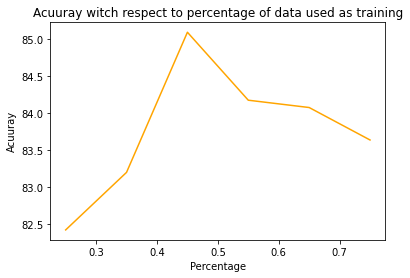

In [405]:
X=[0.25,0.35,0.45,0.55,0.65,0.75]
Y=[ 82.42424242424242  ,83.2 ,85.08875739644971 ,84.1726618705036  ,84.07407407407408  , 83.63636363636363  ]

plt.plot(X,Y,color="orange")
plt.title("Acuuray witch respect to percentage of data used as training")
plt.xlabel("Percentage")
plt.ylabel("Acuuray")
plt.show()

### $Functions_{part2}$
**find_deepest** : finds deepest unvisited node, candidate for pruning. 

In [ ]:
def find_deepest():
    global depth_visit
    m=-1
    m_i=-1
    for i in range(len(depth_visit)):
        if depth_visit[i][0]>m and depth_visit[i][1]==0:
            m=depth_visit[i][0]
            m_i=i
    
    depth_visit[m_i]=(depth_visit[m_i][0],1)
    return m_i
            

**find_val** : returns the label that a node should have, if its children got pruned. the decision is made by counting the labels of samples under the node and returns the label in majority.

In [355]:
def find_val(data,value,tree,node):
    c_Y=0
    c_N=0
    for d in data:
        flag=False
        n=1
        while value[n]!="YES" and value[n]!="NO" and value[n]!="UNKNOWN":
            if n==node:
                flag=True
            n=tree[n,d[value[n]]]
        if flag:
            if d[15]=="YES":
                c_Y+=1
            else:
                c_N+=1
            
    if c_Y==c_N:
        return "UNKNOWN"
    elif c_Y>c_N:
        return "YES"
    else:
        return "NO"

**prune** : prunes the deepest unvisited node and returnes number of node and values of the pruned tree.

In [356]:
def prune(tree,value,data):
    node=find_deepest()
    val=find_val(data,value,tree,node)
    return node,val

**check_if_better** : checks if the pruned tree is better then the original tree, if the accuracy on test set in increases by pruning it returns TRUE.

In [358]:
def check_if_better(val,tst):
    a=predict(T,v,tst)
    b=[]
    for d in data_list[int((r)*len(data_list))+1:]:
        b.append(d[15])
    original=acc(a,b)
    
    v_prune={}
    for i in range(len(v)):
        if i==val[0]:
            v_prune[val[0]]=val[1]
        else:
            v_prune[i]=v[i]
    

    a=predict(T,v_prune,tst)
    b=[]
    for d in data_list[int((r)*len(data_list))+1:]:
        b.append(d[15])
    pruned=acc(a,b)
    
    return original<pruned

**init_prune** : initializes variables needed for pruning such as depth of each node and if the nodes are visited for pruning.

In [444]:
def init_prune(lvl,n):
    global depth_visit,T,v
    if v[n]=="YES" or v[n]=="NO" or v[n]=="UNKNOWN":
        depth_visit[n]=(-1,1)
        return
    depth_visit[n]=(lvl+1,0)
    lvl+=1
    if n==0:
        init_prune(lvl,T[n,0])
    elif v[n]==0:
        init_prune(lvl,T[n,1])
        init_prune(lvl,T[n,2])
        init_prune(lvl,T[n,3])
        init_prune(lvl,T[n,4])
    else:
        init_prune(lvl,T[n,1])
        init_prune(lvl,T[n,2])

**still_an_option** : chekes if there are still options available for pruning

In [445]:
def still_an_option():
    for i in range(len(depth_visit)):
        if depth_visit[i][1]==0:
            return True
    return False

**log_accuracy** : keeps track and saves the accuracy in each level of pruning of train and test data for plotting it later.

In [462]:
def log_acc(acc_tr,acc_tst,tst,trn):
    a=predict(T,v,trn)
    b=[]
    for d in trn:
        b.append(d[15])
    acc_tr.append(acc(a,b))
    
    a=predict(T,v,tst)
    b=[]
    for d in tst:
        b.append(d[15])
    acc_tst.append(acc(a,b))


### $Part$ $Two$
* initializing needed variables
* choose 0.75 of data as train and 0.25 as test
* run ID3 on train set

In [547]:
global depth_visit
depth_visit={}
init_prune(-1,0)

r=0.75
random.shuffle(data_list)
trn=data_list[:int((r)*len(data_list))]
tst=data_list[int((r)*len(data_list))+1:]

T={}
v={}
v[0]=1
m=0
ID3(0,trn[:],[],0)


* prune nodes that increase accuracy on test set until no available nodes for pruning are left

In [548]:
depth=[]
acc_tr=[]
acc_tst=[]

#log_acc(acc_tr,acc_tst,tst[:],trn[:]) 
while still_an_option():
    #log_acc(acc_tr,acc_tst,tst[:],trn[:])
    VNew=prune(T,v,trn)
    if check_if_better(VNew,tst):
        v[VNew[0]]=VNew[1]
        
    log_acc(acc_tr,acc_tst,tst[:],trn[:]) 
    depth.append(depth_visit[VNew[0]][0])

ploting accuracy on train and test set with respect to depth of tree, we can see that by increasing the depth, acuuracy of training increases but accuracy of test decreses, this is because in grater depth, treeis less generalized and is overfitted. by pruning (less depth of tree) accuracy on test set increases this means tree becomes more general and therfore useful.

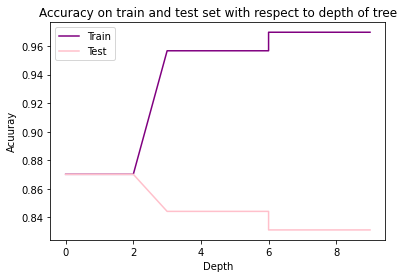

In [549]:
plt.plot(depth,acc_tr,color="purple",label="Train")
plt.plot(depth,acc_tst,color="pink",label="Test")
plt.title("Accuracy on train and test set with respect to depth of tree")
plt.xlabel("Depth")
plt.ylabel("Acuuray")
plt.legend()
plt.show()